## 1) Gathering Data

In [1]:
#Importing the libraries needed
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import os
import json
import re
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#Uploading the twitter-archive-enhanced.csv file and checking the data
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#Uploading the tweet_json.txt file and checking the data
json_file = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        json_file.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
        
json_df = pd.DataFrame(json_file)
json_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [4]:
#Uploading the image-predictions.tsv file and checking the data
images_df = pd.read_csv('image-predictions.tsv', sep='\t')
images_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## 2) Assessing Data

### Visual Assessment:

In `twitter-archived-enhanced.csv`:
- Some dogs' names are "a", "actually", "all", "an", "by", "his", "life", "space", "such", "the", "this", "unacceptable" or "very". They should be converted to no name (I can check for any name that's lowercase and see if it's a valid dog name).
- There are denominators that don't equal to 10 and some of them are wrong ratings.
- Some numerators have exaggerated numbers.
- Retweets and replies should be removed from the dataset.
- Change "None" to null for columns doggo, floofer, pupper and puppo.
- Doggo, floofer, pupper and puppo columns could be merged into one column. 

In `tweet-json.txt`:
- The columns can be merged with twitter-archived-enhanced.csv via the tweet_id.

In `image-predictions.tsv`:
- The columns can be merged with twitter-archived-enhanced.csv via the tweet_id.
- Assign null values to p1, p1_conf, p2, p2_conf, p3 and p3_conf with values of p1_dog, p2_dog, p3_dog = False.
- Remove p1_dog, p2_dog and p3_dog columns.
- The dog type columns should be consistent in the format (all lowercase).
- Change column names to be more representative.

### Programmatic Assessment:

In [5]:
twitter_df.shape

(2356, 17)

In [6]:
twitter_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [7]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
twitter_df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [9]:
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
json_df.shape

(2354, 3)

In [11]:
json_df.dtypes

tweet_id          int64
retweet_count     int64
favorite_count    int64
dtype: object

In [12]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [13]:
json_df.nunique()

tweet_id          2354
retweet_count     1724
favorite_count    2007
dtype: int64

In [14]:
images_df.shape

(2075, 12)

In [15]:
images_df.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [16]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In `twitter-archived-enhanced.csv`:
- tweet_id should be converted to string.
- timestamp and retweeted_status_timestamp should be converted to datetime.
- There are two extra rows that are not in the other two files. Check if any id doesn't have a photo, likes or retweets.

In `tweet-json.txt`:
- tweet_id should be converted to string.

In `image-predictions.tsv`:
- tweet_id should be converted to string.

### 3) Cleaning Data

In [17]:
#Create copies of the 3 DataFrames:
twitter_clean = twitter_df.copy()
json_clean = json_df.copy()
images_clean = images_df.copy()

In [18]:
#Defining:
#Changing the datatype of tweet_id to string

In [19]:
#Coding:
twitter_clean.tweet_id = twitter_clean.tweet_id.astype(str)
json_clean.tweet_id = json_clean.tweet_id.astype(str)
images_clean.tweet_id = images_clean.tweet_id.astype(str)

In [20]:
#Testing:
twitter_clean.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [21]:
json_clean.dtypes

tweet_id          object
retweet_count      int64
favorite_count     int64
dtype: object

In [22]:
images_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [23]:
#Defining:
#Changing the datatype of timestamp and retweeted_status_timestamp to datetime:

In [24]:
#Coding:
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)
twitter_clean.retweeted_status_timestamp = pd.to_datetime(twitter_clean.retweeted_status_timestamp)

In [25]:
#Testing:
twitter_clean.dtypes

tweet_id                                   object
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp    datetime64[ns, UTC]
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

In [26]:
#Defining:
#Remove the retweets and replies by removing any rows with values other than 
#null in columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,
#retweeted_status_user_id and retweeted_status_timestamp. Then delete these columns

In [27]:
#Coding (deleting the rows):
twitter_clean = twitter_clean[twitter_clean.in_reply_to_status_id.isnull()]
twitter_clean = twitter_clean[twitter_clean.retweeted_status_id.isnull()]

In [28]:
#Testing
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

In [29]:
#Coding (deleting the columns):
twitter_clean = twitter_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

In [30]:
#Testing
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

In [31]:
#Defining:
#Change "None" to empty strings for columns doggo, floofer, pupper and puppo by using the replace method. Then after combining the four columns into one,changing the empty strings to null.

In [32]:
#Coding:
twitter_clean.doggo = twitter_clean.doggo.replace("None","")
twitter_clean.floofer = twitter_clean.floofer.replace("None","")
twitter_clean.pupper = twitter_clean.pupper.replace("None","")
twitter_clean.puppo = twitter_clean.puppo.replace("None","")

In [33]:
#Testing:
twitter_clean.doggo.value_counts()

         2014
doggo      83
Name: doggo, dtype: int64

In [34]:
twitter_clean.floofer.value_counts()

           2087
floofer      10
Name: floofer, dtype: int64

In [35]:
twitter_clean.pupper.value_counts()

          1867
pupper     230
Name: pupper, dtype: int64

In [36]:
twitter_clean.puppo.value_counts()

         2073
puppo      24
Name: puppo, dtype: int64

In [37]:
#Defining:
#Combine the doggo, floofer, pupper and puppo columns into one "classification" column

In [38]:
#Coding:
twitter_clean['classification'] = twitter_clean.doggo + twitter_clean.floofer + twitter_clean.pupper + twitter_clean.puppo

In [39]:
#Testing
twitter_clean.classification.value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: classification, dtype: int64

In [40]:
#Defining:
#Dropping the columns doggo, floofer, pupper and puppo as they have no purpose now

In [41]:
#Coding:
twitter_clean = twitter_clean.drop(['doggo','floofer','pupper','puppo'], axis=1)

In [42]:
#Testing:
twitter_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,classification
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,


In [43]:
#Defining:
#Changing the blank strings to null in the classification column by using the replace method
#Changing the format of the dogs with several classifications by adding a "-" between the two strings

In [44]:
#Coding:
twitter_clean.classification.replace(r'^\s*$', np.NaN, regex=True, inplace=True)
twitter_clean.classification.replace('doggopupper', 'doggo-pupper', inplace=True)
twitter_clean.classification.replace('doggopuppo', 'doggo-puppo', inplace=True)
twitter_clean.classification.replace('doggofloofer', 'doggo-floofer', inplace=True)

In [45]:
#Testing:
twitter_clean.classification.value_counts()

pupper           221
doggo             72
puppo             23
floofer            9
doggo-pupper       9
doggo-puppo        1
doggo-floofer      1
Name: classification, dtype: int64

In [46]:
#Defining:
#Checking the wrong dog names (which are in lowercase) and "None" dog names and checking if the correct name is in the text. Otherwise, change dog name to null.

In [47]:
#Coding:
reg = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')

for index, row in twitter_clean.iterrows():  
    if row['name'][0].islower() or row['name'] == 'None':
        try:
            name = re.findall(reg, row['text'])[0]
            twitter_clean.loc[index,'name'] = twitter_clean.loc[index,'name'].replace(row['name'], name)

        except IndexError:
            twitter_clean.loc[index,'name'] = np.NaN

In [48]:
#Testing:
twitter_clean.name.value_counts()

Lucy        11
Charlie     11
Cooper      10
Oliver      10
Penny        9
            ..
Pablo        1
Jareld       1
Chesney      1
Rizzy        1
Clifford     1
Name: name, Length: 955, dtype: int64

In [49]:
#Defining:
#Assign null values to p1, p1_conf, p2, p2_conf, p3 and p3_conf with values of p1_dog, p2_dog, p3_dog = False.

In [50]:
#Coding:
images_clean.p1 = np.where(images_clean.p1_dog == False, np.NaN, images_clean.p1)
images_clean.p1_conf = np.where(images_clean.p1_dog == False, np.NaN, images_clean.p1_conf)
images_clean.p2 = np.where(images_clean.p2_dog == False, np.NaN, images_clean.p2)
images_clean.p2_conf = np.where(images_clean.p2_dog == False, np.NaN, images_clean.p2_conf)
images_clean.p3 = np.where(images_clean.p3_dog == False, np.NaN, images_clean.p3)
images_clean.p3_conf = np.where(images_clean.p3_dog == False, np.NaN, images_clean.p3_conf)

In [51]:
#Testing:
images_clean[images_clean.p1_dog == False].p1.value_counts()

Series([], Name: p1, dtype: int64)

In [52]:
images_clean[images_clean.p1_dog == False].p1_conf.value_counts()

Series([], Name: p1_conf, dtype: int64)

In [53]:
images_clean[images_clean.p2_dog == False].p2.value_counts()

Series([], Name: p2, dtype: int64)

In [54]:
images_clean[images_clean.p2_dog == False].p2_conf.value_counts()

Series([], Name: p2_conf, dtype: int64)

In [55]:
images_clean[images_clean.p3_dog == False].p3.value_counts()

Series([], Name: p3, dtype: int64)

In [56]:
images_clean[images_clean.p3_dog == False].p3_conf.value_counts()

Series([], Name: p3_conf, dtype: int64)

In [57]:
images_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1215,743510151680958465,https://pbs.twimg.com/ext_tw_video_thumb/74350...,1,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False
1973,869702957897576449,https://pbs.twimg.com/media/DBHOOfOXoAABKlU.jpg,1,Pembroke,0.993449,True,Cardigan,0.006325,True,Chihuahua,0.000178,True
1968,868552278524837888,https://pbs.twimg.com/media/DA23sCeVoAE3uF0.jpg,1,whippet,0.378151,True,Italian_greyhound,0.275935,True,American_Staffordshire_terrier,0.094991,True
669,683078886620553216,https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg,1,NaN,NaN,False,Eskimo_dog,0.094044,True,NaN,NaN,False
895,699446877801091073,https://pbs.twimg.com/media/CbTvNpoW0AEemnx.jpg,3,Pembroke,0.969400,True,Cardigan,0.026059,True,Chihuahua,0.003505,True
1840,837820167694528512,https://pbs.twimg.com/media/C6CI_jbVAAA3-a1.jpg,1,golden_retriever,0.887625,True,Labrador_retriever,0.068718,True,kuvasz,0.030387,True
1593,798694562394996736,https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg,1,Chihuahua,0.615163,True,Pembroke,0.159509,True,basenji,0.084466,True
1781,828708714936930305,https://pbs.twimg.com/media/C4AqLSgVYAEg8nt.jpg,1,NaN,NaN,False,Mexican_hairless,0.008388,True,NaN,NaN,False
878,698355670425473025,https://pbs.twimg.com/media/CbEOxQXW0AEIYBu.jpg,1,pug,0.990191,True,Pekinese,0.002799,True,NaN,NaN,False
615,680176173301628928,https://pbs.twimg.com/media/CXB4nWnWEAAhLTX.jpg,1,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False


In [58]:
#Defining:
#Removing p1_dog, p2_dog and p3_dog columns.

In [59]:
#Coding:
images_clean = images_clean.drop(['p1_dog', 'p2_dog', 'p3_dog'], axis=1)

In [60]:
#Testing:
images_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf
1319,756275833623502848,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg,1,Airedale,0.602957,Irish_terrier,0.086981,bloodhound,0.086276
218,670073503555706880,https://pbs.twimg.com/media/CUyUSuWXIAAZKYF.jpg,1,malamute,0.601886,Siberian_husky,0.340106,Eskimo_dog,0.050041
1762,826204788643753985,https://pbs.twimg.com/media/C3dEza1WcAAhlNU.jpg,2,Labrador_retriever,0.782058,golden_retriever,0.156581,soft-coated_wheaten_terrier,0.007275
1185,738885046782832640,https://pbs.twimg.com/media/CkEMBz9WYAAGLaa.jpg,1,NaN,NaN,NaN,NaN,American_Staffordshire_terrier,0.015535
488,675517828909424640,https://pbs.twimg.com/media/CV_r3v4VAAALvwg.jpg,1,Scottish_deerhound,0.240591,groenendael,0.156916,flat-coated_retriever,0.090899


In [61]:
#Defining:
#Unifying the format of p1, p2 and p3 to all lowercase characters.

In [62]:
#Coding:
images_clean.p1 = images_clean.p1.str.lower()
images_clean.p2 = images_clean.p2.str.lower()
images_clean.p3 = images_clean.p3.str.lower()

In [63]:
#Testing:
images_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf
1608,800751577355128832,https://pbs.twimg.com/media/CxzXOyBW8AEu_Oi.jpg,2,cocker_spaniel,0.771984,miniature_poodle,0.076653,toy_poodle,0.039618
1899,851224888060895234,https://pbs.twimg.com/media/C9AohFoWsAUmxDs.jpg,3,NaN,NaN,NaN,NaN,standard_poodle,0.005683
1794,831309418084069378,https://pbs.twimg.com/media/C4lngK5VUAEVrNO.jpg,1,doberman,0.369389,kelpie,0.132449,labrador_retriever,0.074727
152,668645506898350081,https://pbs.twimg.com/media/CUeBiqgXAAARLbj.jpg,1,NaN,NaN,NaN,NaN,NaN,NaN
1540,790987426131050500,https://pbs.twimg.com/media/Cvom3ZJXEAE29TD.jpg,1,cocker_spaniel,0.349195,flat-coated_retriever,0.309535,newfoundland,0.104768


In [64]:
#Defining:
#Changing p1, p2 and p3 column names to prediction1, prediction2 and prediction3.
#Changing p1_conf, p2_conf and p3_conf to prediction1_conf, prediction2_conf and prediction3_conf.

In [65]:
#Coding:
images_clean = images_clean.rename(columns={'p1':'prediction1', 'p2':'prediction2', 'p3':'prediction3', 
                                            'p1_conf':'prediction1_conf', 'p2_conf':'prediction2_conf', 'p3_conf':'prediction3_conf'})

In [66]:
#Testing:
images_clean.head()

,tweet_id,jpg_url,img_num,prediction1,prediction1_conf,prediction2,prediction2_conf,prediction3,prediction3_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,collie,0.156665,shetland_sheepdog,0.061428
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,miniature_pinscher,0.074192,rhodesian_ridgeback,0.072010
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,malinois,0.138584,bloodhound,0.116197
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,redbone,0.360687,miniature_pinscher,0.222752
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,rottweiler,0.243682,doberman,0.154629


In [67]:
#Defining:
#There are denominators that don't equal to 10 and some of them are wrong ratings
#These ratings could be changed manually

In [68]:
#Coding:
twitter_clean.rating_denominator.value_counts()

10     2080
50        3
80        2
11        2
2         1
20        1
40        1
70        1
90        1
110       1
120       1
150       1
170       1
7         1
Name: rating_denominator, dtype: int64

In [69]:
twitter_clean.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
0         1
27        1
45        1
99        1
121       1
75        1
144       1
1776      1
420       1
204       1
88        1
84        1
80        1
60        1
50        1
44        1
26        1
24        1
165       1
Name: rating_numerator, dtype: int64

In [70]:
twitter_clean[twitter_clean.rating_denominator != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,classification
433,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,NaN
516,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN
902,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,NaN,NaN
1068,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,NaN,NaN
1120,731156023742988288,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,NaN,NaN
1165,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,NaN,NaN
1202,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,NaN
1228,713900603437621249,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,NaN,NaN
1254,710658690886586372,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,NaN,NaN
1274,709198395643068416,2016-03-14 02:04:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,NaN,NaN


In [71]:
twitter_clean.loc[433].text

'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd'

In [72]:
#Upon inspection, there are 7 puppies in the photo (that's why the rating is out of 70). To unify the format, I will divide the score by 7.
twitter_clean.rating_numerator = twitter_clean.rating_numerator.replace(84,12)
twitter_clean.rating_denominator = twitter_clean.rating_denominator.replace(70,10)

In [73]:
twitter_clean.loc[516].text

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [74]:
#There is no rating, so numerator and denominator should be set to 0.
twitter_clean.rating_numerator = twitter_clean.rating_numerator.replace(24,0)
twitter_clean.rating_denominator = twitter_clean.rating_denominator.replace(7,0)

In [75]:
twitter_clean.loc[902].text

'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE'

In [76]:
#There are 15 dogs in the picture. Numerator and denominator should be divided by 15:
twitter_clean.rating_numerator  = twitter_clean.rating_numerator.replace(165,11)
twitter_clean.rating_denominator = twitter_clean.rating_denominator.replace(150,10)

In [77]:
twitter_clean.loc[1068].text

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'

In [78]:
#Since there are several occurrences of 9 as the numerator and 11 as the denominator, I used the loc method to index the specific row to change.
twitter_clean.rating_numerator  = twitter_clean.rating_numerator.replace(twitter_clean.loc[1068].rating_numerator,14)
twitter_clean.rating_denominator = twitter_clean.rating_denominator.replace(twitter_clean.loc[1068].rating_denominator,10)

In [79]:
twitter_clean.loc[1120].text

'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'

In [80]:
#There are 17 dogs in the picture. Numerator and denominator should be divided by 17:
twitter_clean.rating_numerator  = twitter_clean.rating_numerator.replace(204,12)
twitter_clean.rating_denominator = twitter_clean.rating_denominator.replace(170,10)

In [81]:
twitter_clean.loc[1165].text

'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a'

In [82]:
twitter_clean.rating_numerator  = twitter_clean.rating_numerator.replace(twitter_clean.loc[1165].rating_numerator,13)
twitter_clean.rating_denominator = twitter_clean.rating_denominator.replace(20,10)

In [83]:
twitter_clean.loc[1202].text

'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq'

In [84]:
twitter_clean.rating_numerator  = twitter_clean.rating_numerator.replace(50,11)
twitter_clean.rating_denominator = twitter_clean.rating_denominator.replace(twitter_clean.loc[1202].rating_denominator,10)

In [85]:
twitter_clean.loc[1228].text

"Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1"

In [86]:
#There are 9 dogs in the picture. Numerator and denominator should be divided by 9:
twitter_clean.rating_numerator  = twitter_clean.rating_numerator.replace(99,11)
twitter_clean.rating_denominator = twitter_clean.rating_denominator.replace(90,10)

In [87]:
twitter_clean.loc[1254].text

"Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12"

In [88]:
#There are 8 dogs in the picture. Numerator and denominator should be divided by 8:
twitter_clean.rating_numerator  = twitter_clean.rating_numerator.replace(80,10)
twitter_clean.rating_denominator = twitter_clean.rating_denominator.replace(twitter_clean.loc[1254].rating_denominator,10)

In [89]:
twitter_clean.loc[1274].text

'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK'

In [90]:
#There are 5 dogs in the picture. Numerator and denominator should be divided by 5:
twitter_clean.rating_numerator  = twitter_clean.rating_numerator.replace(45,9)
twitter_clean.rating_denominator = twitter_clean.rating_denominator.replace(twitter_clean.loc[1274].rating_denominator,10)

In [91]:
twitter_clean.loc[1351].text

"Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa"

In [92]:
#There are 5 dogs in the picture. Numerator and denominator should be divided by 5:
twitter_clean.rating_numerator  = twitter_clean.rating_numerator.replace(60,12)
twitter_clean.rating_denominator = twitter_clean.rating_denominator.replace(twitter_clean.loc[1351].rating_denominator,10)

In [93]:
twitter_clean.loc[1433].text

"Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ"

In [94]:
#There are 4 dogs in the picture. Numerator and denominator should be divided by 4:
twitter_clean.rating_numerator  = twitter_clean.rating_numerator.replace(44,11)
twitter_clean.rating_denominator = twitter_clean.rating_denominator.replace(40,10)

In [95]:
twitter_clean.loc[1635].text

'Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55'

In [96]:
#There are 11 dogs in the picture. Numerator and denominator should be divided by 11:
twitter_clean.rating_numerator  = twitter_clean.rating_numerator.replace(121,11)
twitter_clean.rating_denominator = twitter_clean.rating_denominator.replace(110,10)

In [97]:
twitter_clean.loc[1662].text

'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'

In [98]:
twitter_clean.rating_numerator  = twitter_clean.rating_numerator.replace(twitter_clean.loc[1662].rating_numerator,10)
twitter_clean.rating_denominator = twitter_clean.rating_denominator.replace(twitter_clean.loc[1662].rating_denominator,10)

In [99]:
twitter_clean.loc[1779].text

"IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq"

In [100]:
#There are 12 dogs in the picture. Numerator and denominator should be divided by 12:
twitter_clean.rating_numerator  = twitter_clean.rating_numerator.replace(144,12)
twitter_clean.rating_denominator = twitter_clean.rating_denominator.replace(120,10)

In [101]:
twitter_clean.loc[1843].text

'Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw'

In [102]:
#There are 8 dogs in the picture. Numerator and denominator should be divided by 8:
twitter_clean.rating_numerator  = twitter_clean.rating_numerator.replace(88,11)
twitter_clean.rating_denominator = twitter_clean.rating_denominator.replace(twitter_clean.loc[1843].rating_denominator,10)

In [103]:
twitter_clean.loc[2335].text

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [104]:
twitter_clean.rating_numerator  = twitter_clean.rating_numerator.replace(twitter_clean.loc[2335].rating_numerator,9)
twitter_clean.rating_denominator = twitter_clean.rating_denominator.replace(2,10)

In [105]:
#Testing
twitter_clean.rating_denominator.value_counts()

10    2096
0        1
Name: rating_denominator, dtype: int64

In [106]:
twitter_clean.rating_numerator.value_counts()

12      490
10      489
11      419
13      303
14      191
8        98
5        34
6        32
3        19
2         9
9         6
0         2
27        1
420       1
1776      1
26        1
75        1
Name: rating_numerator, dtype: int64

In [107]:
#Defining:
#Some numerators are still exaggerated (75, 1776, 26, 420 and 27)

In [108]:
#Coding:
twitter_clean[twitter_clean.rating_numerator == 27]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,classification
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper


In [109]:
twitter_clean.loc[763].text

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [110]:
#11.27 could be rounded to 11
twitter_clean.rating_numerator  = twitter_clean.rating_numerator.replace(27,11)

In [111]:
twitter_clean[twitter_clean.rating_numerator == 75]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,classification
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,NaN


In [112]:
twitter_clean.loc[695].text

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [113]:
#9.75 could be rounded to 10
twitter_clean.rating_numerator  = twitter_clean.rating_numerator.replace(75,10)

In [114]:
twitter_clean[twitter_clean.rating_numerator == 1776]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,classification
979,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,NaN


In [115]:
twitter_clean.loc[979].text

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [116]:
#No changes will be made in this case

In [117]:
twitter_clean[twitter_clean.rating_numerator == 26]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,classification
1712,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,NaN,NaN


In [118]:
twitter_clean.loc[1712].text

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [119]:
#11.26 could be rounded to 11
twitter_clean.rating_numerator  = twitter_clean.rating_numerator.replace(26,11)

In [120]:
twitter_clean[twitter_clean.rating_numerator == 420]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,classification
2074,670842764863651840,2015-11-29 05:52:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,NaN,NaN


In [121]:
twitter_clean.loc[2074].text

'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'

In [122]:
#No changes will be made in this case

In [123]:
#Defining:
#Combining the 3 datasets into 1 dataset using tweet_id

In [124]:
#Coding:
twitter_archive_master = pd.merge(twitter_clean, json_clean, on='tweet_id', how='left')
twitter_archive_master = pd.merge(twitter_archive_master, images_clean, on='tweet_id', how='left')

In [125]:
#Testing:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,classification,retweet_count,favorite_count,jpg_url,img_num,prediction1,prediction1_conf,prediction2,prediction2_conf,prediction3,prediction3_conf
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,pekinese,0.090647,papillon,0.068957
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,malamute,0.078253,kelpie,0.031379
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,NaN,NaN,labrador_retriever,0.168086,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,english_springer,0.225770,german_short-haired_pointer,0.175219


In [126]:
#Checking to see if any tweets don't have images
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1422 non-null   object             
 8   classification      336 non-null    object             
 9   retweet_count       2097 non-null   int64              
 10  favorite_count      2097 non-null   int64              
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

In [127]:
#Defining:
#Removing any rows without images (jpg_url.isnull())

In [128]:
#Coding:
twitter_archive_master = twitter_archive_master[twitter_archive_master.jpg_url.notnull()]

In [129]:
#Testing:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1379 non-null   object             
 8   classification      303 non-null    object             
 9   retweet_count       1971 non-null   int64              
 10  favorite_count      1971 non-null   int64              
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

### 4) Storing Data

In [130]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

### 5) Analyzing & Visualizing Data

In [131]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,classification,retweet_count,favorite_count,jpg_url,img_num,prediction1,prediction1_conf,prediction2,prediction2_conf,prediction3,prediction3_conf
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,pekinese,0.090647,papillon,0.068957
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,malamute,0.078253,kelpie,0.031379
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,NaN,NaN,labrador_retriever,0.168086,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,english_springer,0.225770,german_short-haired_pointer,0.175219


In [132]:
twitter_archive_master.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,prediction1_conf,prediction2_conf,prediction3_conf
count,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1463.000000,1480.000000,1431.000000
mean,12.182141,9.994926,2784.449518,8949.106545,1.201928,0.615043,0.140192,0.061234
std,40.856624,0.225246,4697.662893,12267.799790,0.559020,0.260249,0.103893,0.052098
min,0.000000,0.000000,16.000000,81.000000,1.000000,0.044333,0.000010,0.000001
25%,10.000000,10.000000,628.500000,1997.000000,1.000000,0.392932,0.054295,0.016222
50%,11.000000,10.000000,1367.000000,4147.000000,1.000000,0.615741,0.124191,0.049033
75%,12.000000,10.000000,3239.000000,11402.500000,1.000000,0.853345,0.203656,0.094678
max,1776.000000,10.000000,79515.000000,132810.000000,4.000000,0.999956,0.467678,0.273419


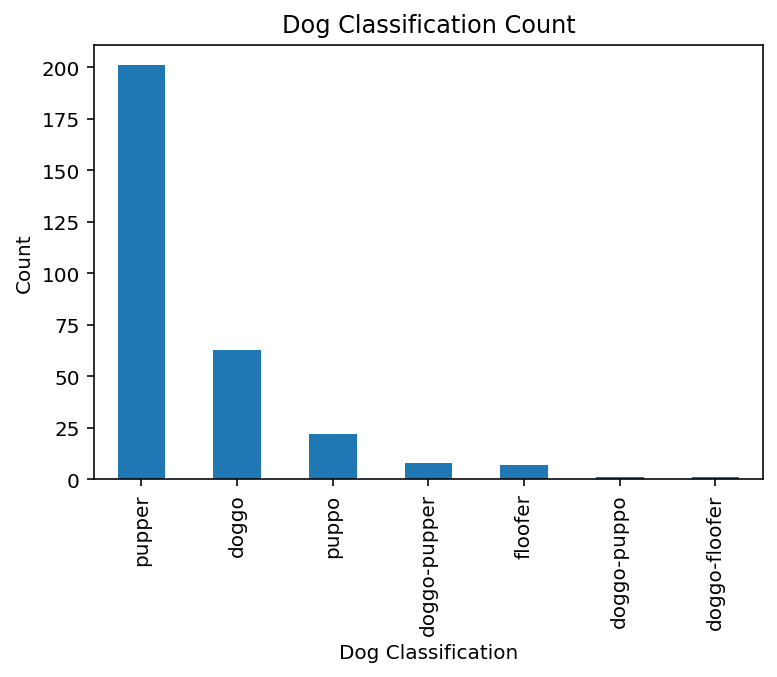

In [133]:
plot_1 = twitter_archive_master['classification'].value_counts()
plot_1.plot(kind='bar', title='Dog Classification Count');
plt.xlabel('Dog Classification');
plt.ylabel('Count');

Based on the above bar chart, "pupper" was the classification most used to describe the dogs, followed by doggo, puppo, etc.

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


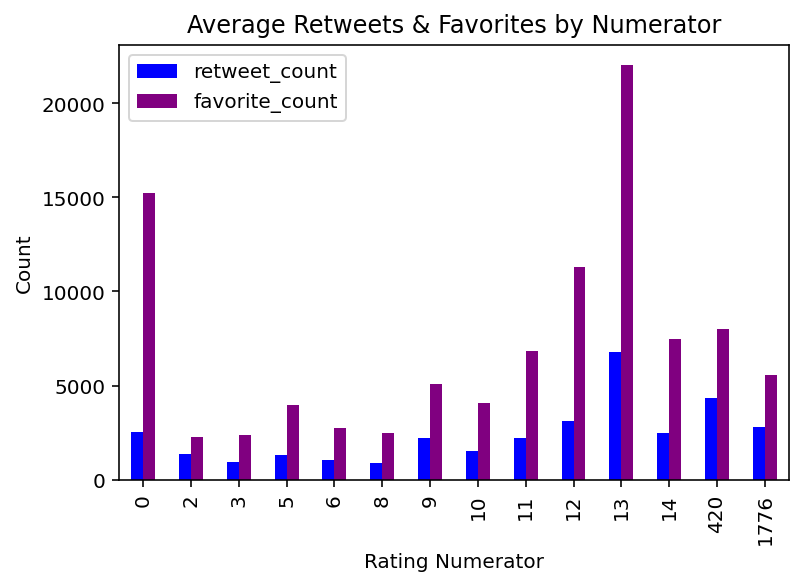

In [134]:
colors = ['blue','purple']
plot_2 = twitter_archive_master.groupby(['rating_numerator'])['retweet_count','favorite_count'].mean()
plot_2.plot(kind='bar', title='Average Retweets & Favorites by Numerator', color=colors)
plt.xlabel('Rating Numerator');
plt.ylabel('Count');

In [135]:
#Getting the retweet and favorite ratios to create a more accurate plot.

In [136]:
twitter_archive_master['retweet_ratio'] = twitter_archive_master['retweet_count'] / twitter_archive_master['retweet_count'].max()

In [137]:
twitter_archive_master['favorite_ratio'] = twitter_archive_master['favorite_count'] / twitter_archive_master['favorite_count'].max()

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


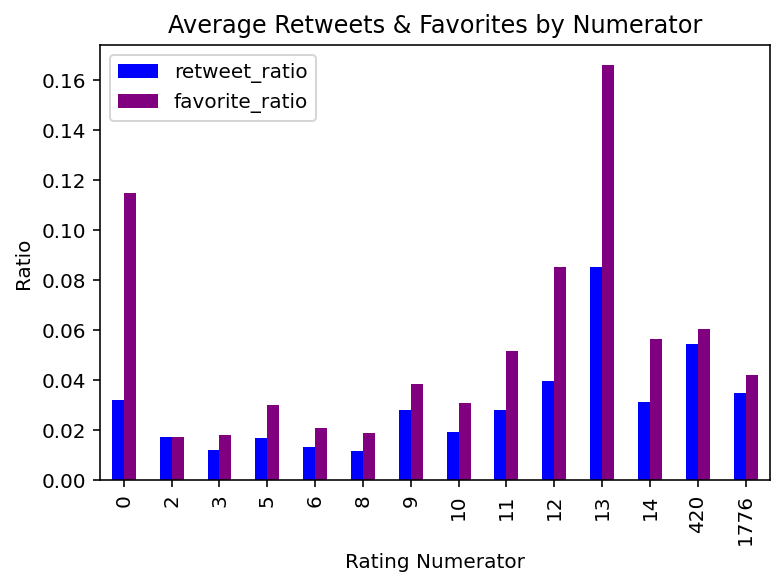

In [138]:
colors = ['blue','purple']
plot_3 = twitter_archive_master.groupby(['rating_numerator'])['retweet_ratio','favorite_ratio'].mean()
plot_3.plot(kind='bar', title='Average Retweets & Favorites by Numerator', color=colors)
plt.xlabel('Rating Numerator');
plt.ylabel('Ratio');

In [139]:
twitter_archive_master.groupby('rating_numerator').mean()

,rating_denominator,retweet_count,favorite_count,img_num,prediction1_conf,prediction2_conf,prediction3_conf,retweet_ratio,favorite_ratio
rating_numerator,,,,,,,,,
0,5.0,2549.000000,15250.500000,2.000000,0.871342,0.024719,0.016431,0.032057,0.114829
2,10.0,1350.333333,2256.777778,1.000000,0.759945,0.103599,0.080385,0.016982,0.016993
3,10.0,952.578947,2395.526316,1.000000,0.465114,0.084305,0.059382,0.011980,0.018037
5,10.0,1333.787879,3950.424242,1.000000,0.802873,0.117806,0.056453,0.016774,0.029745
6,10.0,1043.625000,2716.968750,1.031250,0.443577,0.212016,0.080117,0.013125,0.020458
8,10.0,904.705263,2450.905263,1.052632,0.544809,0.141531,0.057583,0.011378,0.018454
9,10.0,2213.666667,5105.500000,1.000000,0.674157,0.073289,0.054382,0.027840,0.038442
10,10.0,1506.560510,4097.023355,1.131635,0.590129,0.141854,0.062680,0.018947,0.030849
11,10.0,2200.120000,6859.062500,1.195000,0.629008,0.139847,0.062341,0.027669,0.051646


According to the chart and table above, the numerator with the greatest mean of favorite counts and retweet counts was 13.

In [140]:
twitter_archive_master.groupby(twitter_archive_master['timestamp'].dt.year).mean()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,prediction1_conf,prediction2_conf,prediction3_conf,retweet_ratio,favorite_ratio
timestamp,,,,,,,,,,
2015,10.890076,10.000000,1077.706870,2492.277863,1.050382,0.581917,0.142533,0.064869,0.013554,0.018766
2016,12.981289,9.989605,2754.537422,7775.503119,1.241164,0.621968,0.139740,0.060263,0.034642,0.058546
2017,12.401130,10.000000,6023.692090,24085.347458,1.375706,0.647090,0.137810,0.058022,0.075755,0.181352


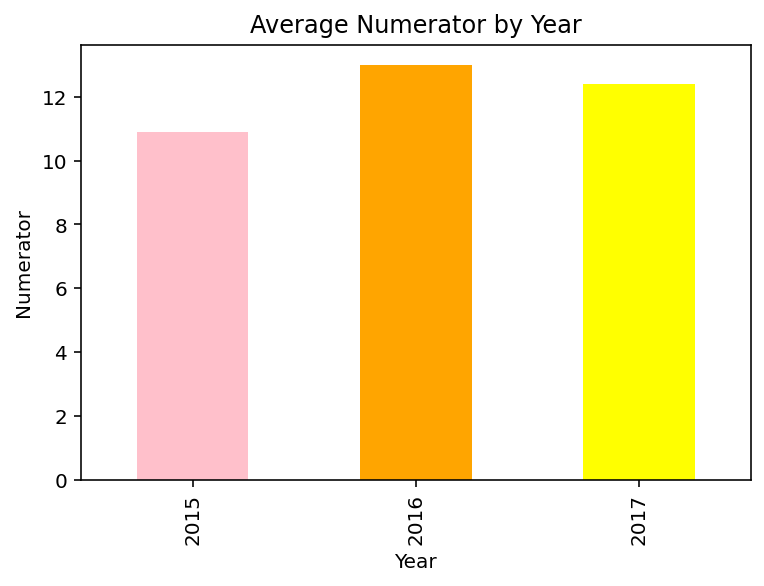

In [141]:
colors=['pink','orange','yellow']
plot_4 = twitter_archive_master.groupby(twitter_archive_master['timestamp'].dt.year)['rating_numerator'].mean()
plot_4.plot(kind='bar', title='Average Numerator by Year',color=colors)
plt.xlabel('Year');
plt.ylabel('Numerator');

2016 was the year with the highest mean value of the numerator.

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


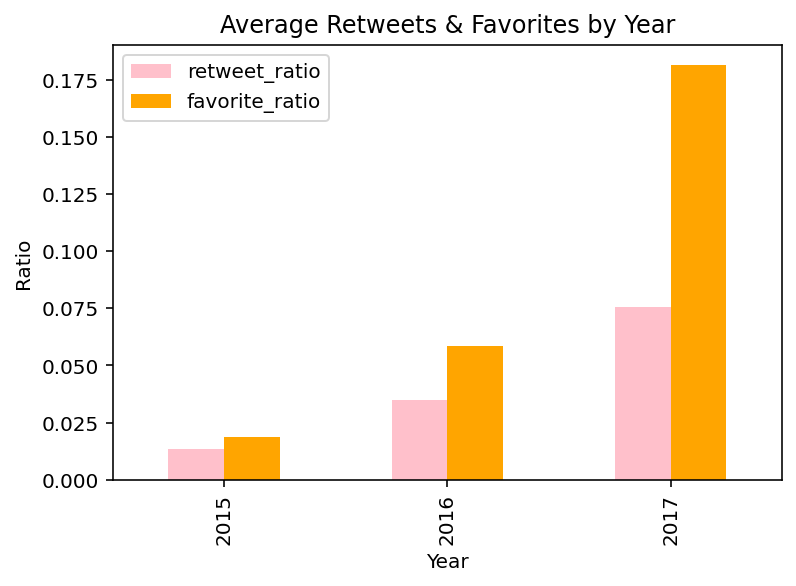

In [142]:
plot_5 = twitter_archive_master.groupby(twitter_archive_master['timestamp'].dt.year)['retweet_ratio','favorite_ratio'].mean()
plot_5.plot(kind='bar', title='Average Retweets & Favorites by Year',color=colors)
plt.xlabel('Year');
plt.ylabel('Ratio');

2017 was the year with the highes mean values of favorite counts and retweet counts.

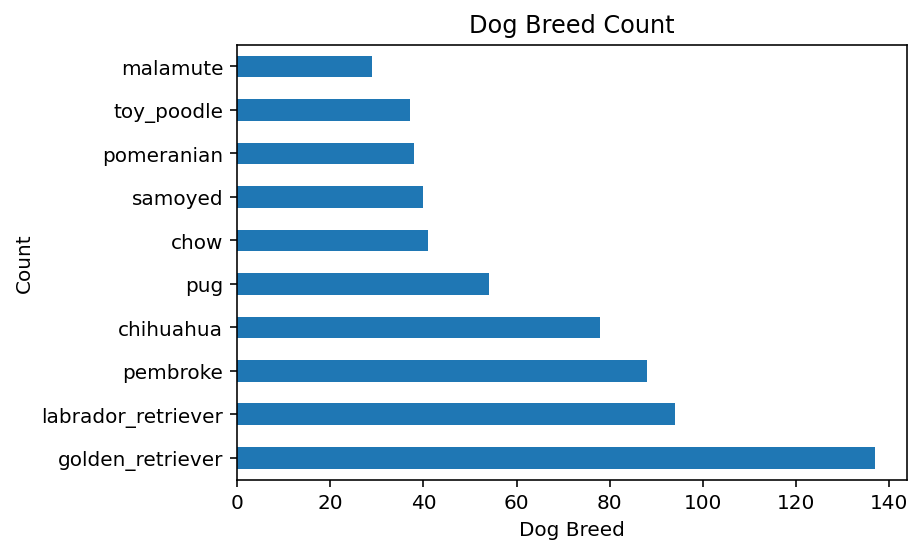

In [143]:
plot_6 = twitter_archive_master['prediction1'].value_counts()
plot_6[:10].plot(kind='barh', title='Dog Breed Count')
plt.xlabel('Dog Breed');
plt.ylabel('Count');